In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data was obtained from WaterNSW, the state-owned corporation in charge of managing water in New South Wales. They operate the dams within the state, and are in charge of 2/3 of the state's water supply (which the Hawkesbury-Nepean catchment is located within). The data was found by making an account on their website: (https://www.waternsw.com.au/)

In [4]:
#Load in Discharge Data
df_212270 = pd.read_csv('Data/Inflow/212270.csv', index_col=0, usecols= [1,2], parse_dates=True)
df_212270.index = df_212270.index.date
df_212270.rename(columns={'Flow Rate (ML/day)': '212270'}, inplace= True)

df_212260 = pd.read_csv('Data/Inflow/212260.csv', index_col=0, usecols= [1,2], parse_dates=True)
df_212260.index = df_212260.index.date
df_212260.rename(columns={'Flow Rate (ML/day)': '212260'}, inplace= True)

df_212250 = pd.read_csv('Data/Inflow/212250.csv',index_col=0, usecols= [1,2], parse_dates=True)
df_212250.index = df_212250.index.date
df_212250.rename(columns={'Flow Rate (ML/day)': '212250'}, inplace= True)

df_212280 = pd.read_csv('Data/Inflow/212280.csv', index_col=0, usecols= [1,2], parse_dates=True)
df_212280.index = df_212280.index.date
df_212280.rename(columns={'Flow Rate (ML/day)': '212280'}, inplace= True)


df_discharge = pd.concat([df_212250, df_212260, df_212270, df_212280], axis = 1, join='outer')

#df_discharge['Inflow Discharge (ML/day)'] = df_discharge['212250']+ df_discharge['212260']+ df_discharge['212270']+ df_discharge['212280']
df_discharge.index = pd.to_datetime(df_discharge.index)

df_discharge = df_discharge.resample('D').max()
#df_discharge.index = df_discharge.index.date

df_discharge



,212250,212260,212270,212280
1975-03-30,NaN,NaN,NaN,39.834
1975-03-31,NaN,NaN,NaN,NaN
1975-04-01,NaN,NaN,NaN,NaN
1975-04-02,307.758,NaN,NaN,NaN
1975-04-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-09-14,188.645,170.526,352.426,17.448
2024-09-15,177.373,161.699,347.600,17.448
2024-09-16,175.794,152.053,334.657,15.582
2024-09-17,172.660,145.631,330.934,15.582


In [3]:
'''This function is used to fill the gaps in the discharge data by a rolling mean of the discharge of the 30 days prior'''
def fill_nan_with_rolling_mean(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, forcing errors to NaN
        nan_indices = df[df[col].isna()].index  # Get indices of NaN values
        for idx in nan_indices:
            # Select the last 7 valid (non-NaN) values based on the DateTime index
            prior_values = df[col].loc[:idx].dropna().rolling('30D').mean()
            if not prior_values.empty:
                df.at[idx, col] = prior_values.iloc[-1]  # Use last calculated mean
    return df

In [4]:
df_discharge_filled = fill_nan_with_rolling_mean(df_discharge)
#inflow = df_discharge_filled['Inflow Discharge (ML/day)'].resample('ME').mean()
#fig, ax = plt.subplots(figsize = (16,7))
#inflow.plot(ax = ax)
#ax.set_ylim(0, 500000)

In [5]:
df_discharge_filled.dropna(how = 'any',axis = 0, inplace=True)
df_discharge_filled_test = df_discharge_filled.copy()
df_discharge_filled_test['Q_sum [ML/d]'] = df_discharge_filled.sum(axis = 1)

df_discharge_filled_test

,212250,212260,212270,212280,Q_sum [ML/d]
1975-06-21,51993.494000,28879.4600,13548.371000,16332.240000,110753.565000
1975-06-22,33751.208000,28879.4600,775.573360,618.256688,64024.498049
1975-06-23,3146.529365,28879.4600,788.731627,636.177889,33450.898881
1975-06-24,3240.947370,28879.4600,802.199712,654.936954,33577.544035
1975-06-25,3338.506660,28879.4600,816.777841,674.312734,33709.057235
...,...,...,...,...,...
2024-09-14,188.645000,170.5260,352.426000,17.448000,729.045000
2024-09-15,177.373000,161.6990,347.600000,17.448000,704.120000
2024-09-16,175.794000,152.0530,334.657000,15.582000,678.086000
2024-09-17,172.660000,145.6310,330.934000,15.582000,664.807000


Text(0, 0.5, 'Inflow [ML/day]')

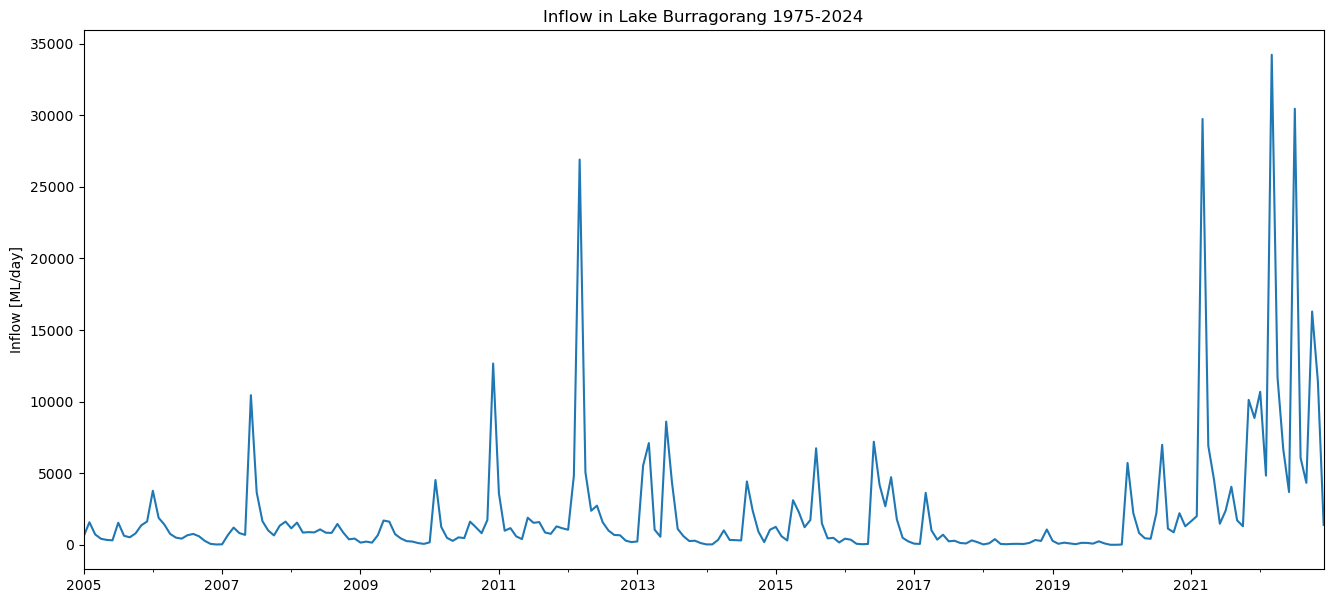

In [ ]:
'''The estimation for the discharge was done in the same way as described in Devanand et al. (2023). This graph was made to be compared to figure 3 from the paper.
The shape of the graphs are very similar, meaning our method of filling in gaps in the data is not completely off. '''
discharge_test = df_discharge_filled_test['Q_sum [ML/d]'].resample('ME').mean()
fig, ax = plt.subplots(figsize = (16,7))
discharge_test['2005': '2022'].plot(ax = ax)
ax.set_title('Inflow in Lake Burragorang 1975-2024')
ax.set_ylabel('Inflow [ML/day]')
#ax.set_ylim(0, 500000)

In [7]:
'''Use this code block if you have the Camel Data Files stored locally'''
#Load in Camel Precipitation Data
# df_camel = pd.read_csv('Data/Prep_Camel_SILO.csv')
# df_camel['time'] = pd.to_datetime(df_camel[['year', 'month', 'day']])
# df_camel.drop(['day', 'year', 'month'], axis= 1, inplace = True)
# df_camel.set_index('time', inplace=True)
# df_camel.rename(columns={'212260': 'RH'}, inplace=True)
# df_camel = df_camel['RH']

# #Load in Precipitation File from BOM
# df = pd.read_csv('Data/Warrangamba_Prep.csv', usecols=[2,3,4,5])
# df['time'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
# df.drop(['Day', 'Year', 'Month'], axis= 1, inplace = True)
# df.dropna(axis= 0, inplace=True)
# df.set_index('time', inplace=True)
# df.rename(columns={'Rainfall amount (millimetres)':'RH'}, inplace=True)

# df = df.loc['2019': '2024']
# df = pd.concat([df_camel, df], axis = 0, join = 'outer')
# df['RH'] = df['RH'] * ((75000**2)/1000)/1000 #Convert from mm to ML

# df

'Use this code block if you have the Camel Data Files stored locally'

In [ ]:
'''Use this code block if you are working from Github
Since the Available Camel Data ends in 2018, precipitation data from a station near the Warrangamba dam is used to also include 2019-2024.
This station has not been used for prior dates, because it only has reliable/consistent data from 2018 onwards.'''
#Load in Camel Precipitation Data
df_camel = pd.read_csv('Data/Prep_Camel_212260.csv')
df_camel['time'] = pd.to_datetime(df_camel['time'])
df_camel.set_index('time', inplace=True)
df_camel.rename(columns={'212260': 'RH'}, inplace=True)
df_camel = df_camel['RH']

#Load in Precipitation File from BOM
df = pd.read_csv('Data/Warrangamba_Prep.csv', usecols=[2,3,4,5])
df['time'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.drop(['Day', 'Year', 'Month'], axis= 1, inplace = True)
df.dropna(axis= 0, inplace=True)
df.set_index('time', inplace=True)
df.rename(columns={'Rainfall amount (millimetres)':'RH'}, inplace=True)

df = df.loc['2019': '2024']
df = pd.concat([df_camel, df], axis = 0, join = 'outer')
df['RH'] = df['RH'] * ((75000**2)/1000)/1000 #Convert from mm to ML

df

,RH
time,
1900-01-01,8.260200
1900-01-02,0.000000
1900-01-03,3497.895844
1900-01-04,20.549813
1900-01-05,87405.289763
...,...
2024-01-28,0.000000
2024-01-29,0.000000
2024-01-30,0.000000


In [9]:
df_inflow = pd.concat([df_discharge_filled, df], axis = 1, join='inner')
df_inflow['Inflow Sum [ML/d]'] = df_inflow.sum(axis = 1)

df_inflow

,212250,212260,212270,212280,RH,Inflow Sum [ML/d]
1975-06-21,51993.494000,28879.460,13548.371000,16332.240000,556207.342425,666960.907425
1975-06-22,33751.208000,28879.460,775.573360,618.256688,348101.881425,412126.379474
1975-06-23,3146.529365,28879.460,788.731627,636.177889,75013.969894,108464.868775
1975-06-24,3240.947370,28879.460,802.199712,654.936954,63831.864431,97409.408467
1975-06-25,3338.506660,28879.460,816.777841,674.312734,6881.156044,40590.213279
...,...,...,...,...,...,...
2024-01-28,362.345000,160.260,385.703000,41.574000,0.000000,949.882000
2024-01-29,319.038000,144.370,336.529000,36.951000,0.000000,836.888000
2024-01-30,286.996000,132.178,293.575000,36.951000,0.000000,749.700000
2024-01-31,274.704000,128.671,259.266000,34.045000,0.000000,696.686000


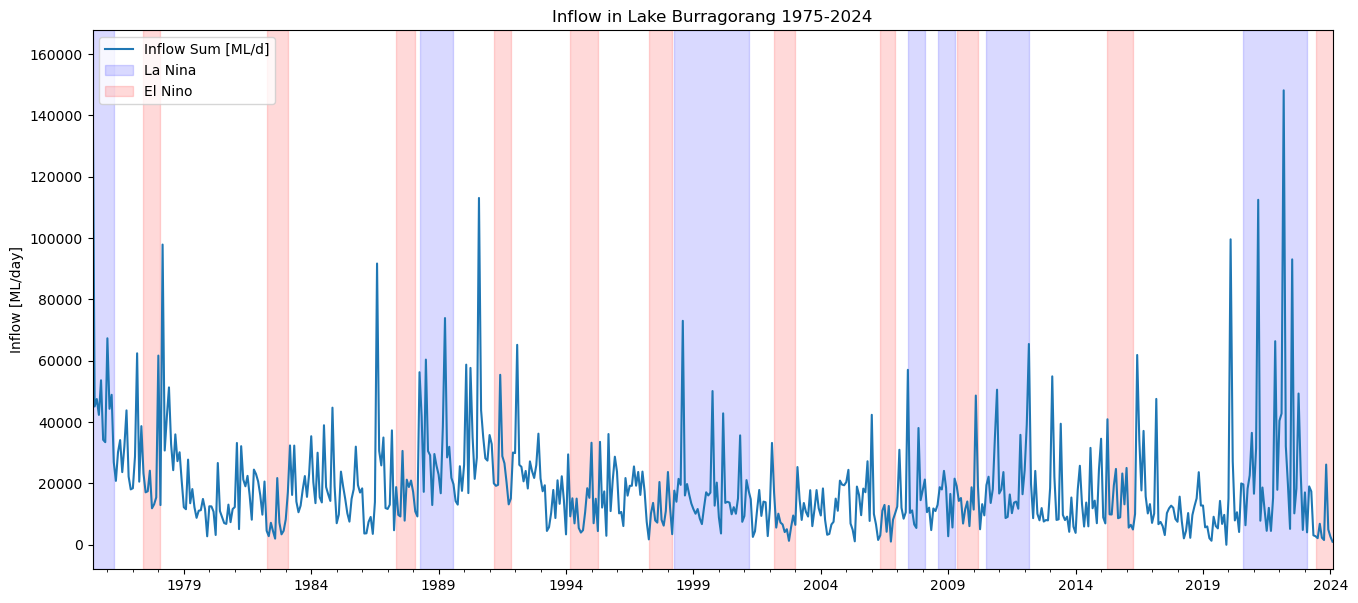

In [ ]:
''''Here we plot the monthly mean of the Inflow to compare it visually to El Niño and La Niña periods'''

inflow = df_inflow['Inflow Sum [ML/d]'].resample('ME').mean()
fig, ax = plt.subplots(figsize = (16,7))
inflow.plot(ax = ax)
ax.axvspan('1975-06-21', '1976-04', color = 'b' , alpha= 0.15, label = 'La Nina')
ax.axvspan('1977-06', '1978-02', color = 'r' , alpha= 0.15, label = 'El Nino')
ax.axvspan('1982-04', '1983-02', color = 'r' , alpha= 0.15)
ax.axvspan('1987-05', '1988-02', color = 'r' , alpha= 0.15)
ax.axvspan('1988-04', '1989-08', color = 'b' , alpha= 0.15)
ax.axvspan('1991-03', '1991-11', color = 'r' , alpha= 0.15)
ax.axvspan('1994-03', '1995-04', color = 'r' , alpha= 0.15)
ax.axvspan('1997-04', '1998-03', color = 'r' , alpha= 0.15)
ax.axvspan('1998-04', '2001-03', color = 'b' , alpha= 0.15)
ax.axvspan('2002-03', '2003-01', color = 'r' , alpha= 0.15)
ax.axvspan('2006-05', '2006-12', color = 'r' , alpha= 0.15)
ax.axvspan('2007-06', '2008-02', color = 'b' , alpha= 0.15)
ax.axvspan('2008-08', '2009-04', color = 'b' , alpha= 0.15)
ax.axvspan('2009-05', '2010-03', color = 'r' , alpha= 0.15)
ax.axvspan('2010-07', '2012-03', color = 'b' , alpha= 0.15)
ax.axvspan('2015-04', '2016-04', color = 'r' , alpha= 0.15)
ax.axvspan('2020-08', '2023-02', color = 'b' , alpha= 0.15)
ax.axvspan('2023-06', '2024-03', color = 'r' , alpha= 0.15)
ax.set_title('Inflow in Lake Burragorang 1975-2024')
ax.set_ylabel('Inflow [ML/day]')
ax.legend()
#ax.set_ylim(0, 500000)

In [11]:
el_nino_periods = [(pd.Timestamp("1977-06-01"), pd.Timestamp("1978-02-28")),
                   (pd.Timestamp("1982-04-01"), pd.Timestamp("1983-02-28")),
                   (pd.Timestamp("1987-05-01"), pd.Timestamp("1988-02-28")),
                   (pd.Timestamp("1991-03-01"), pd.Timestamp("1991-11-30")),
                   (pd.Timestamp("1994-03-01"), pd.Timestamp("1995-04-30")),
                   (pd.Timestamp("1997-04-01"), pd.Timestamp("1998-03-31")),
                   (pd.Timestamp("2002-03-01"), pd.Timestamp("2003-01-31")),
                   (pd.Timestamp("2006-05-01"), pd.Timestamp("2006-12-31")),
                   (pd.Timestamp("2009-05-01"), pd.Timestamp("2010-03-31")),
                   (pd.Timestamp("2015-04-01"), pd.Timestamp("2016-04-30")),
                   (pd.Timestamp("2023-06-01"), pd.Timestamp("2024-03-01"))]

la_nina_periods = [(pd.Timestamp("1975-06-01"), pd.Timestamp("1976-04-30")),
                   (pd.Timestamp("1988-04-01"), pd.Timestamp("1989-08-31")),
                   (pd.Timestamp("1998-04-01"), pd.Timestamp("2001-03-31")),
                   (pd.Timestamp("2007-06-01"), pd.Timestamp("2008-02-28")),
                   (pd.Timestamp("2008-08-01"), pd.Timestamp("2009-04-30")),
                   (pd.Timestamp("2010-07-01"), pd.Timestamp("2012-03-31")),
                   (pd.Timestamp("2020-08-01"), pd.Timestamp("2023-02-28"))]

def classify_enso(date):
    for start, end in el_nino_periods:
        if start <= date <= end:
            return "El Niño"
    for start, end in la_nina_periods:
        if start <= date <= end:
            return "La Niña"
    return "Neutral"

In [12]:
df_inflow["ENSO Phase"] = df_inflow.index.to_series().apply(classify_enso)

df_inflow

,212250,212260,212270,212280,RH,Inflow Sum [ML/d],ENSO Phase
1975-06-21,51993.494000,28879.460,13548.371000,16332.240000,556207.342425,666960.907425,La Niña
1975-06-22,33751.208000,28879.460,775.573360,618.256688,348101.881425,412126.379474,La Niña
1975-06-23,3146.529365,28879.460,788.731627,636.177889,75013.969894,108464.868775,La Niña
1975-06-24,3240.947370,28879.460,802.199712,654.936954,63831.864431,97409.408467,La Niña
1975-06-25,3338.506660,28879.460,816.777841,674.312734,6881.156044,40590.213279,La Niña
...,...,...,...,...,...,...,...
2024-01-28,362.345000,160.260,385.703000,41.574000,0.000000,949.882000,El Niño
2024-01-29,319.038000,144.370,336.529000,36.951000,0.000000,836.888000,El Niño
2024-01-30,286.996000,132.178,293.575000,36.951000,0.000000,749.700000,El Niño
2024-01-31,274.704000,128.671,259.266000,34.045000,0.000000,696.686000,El Niño


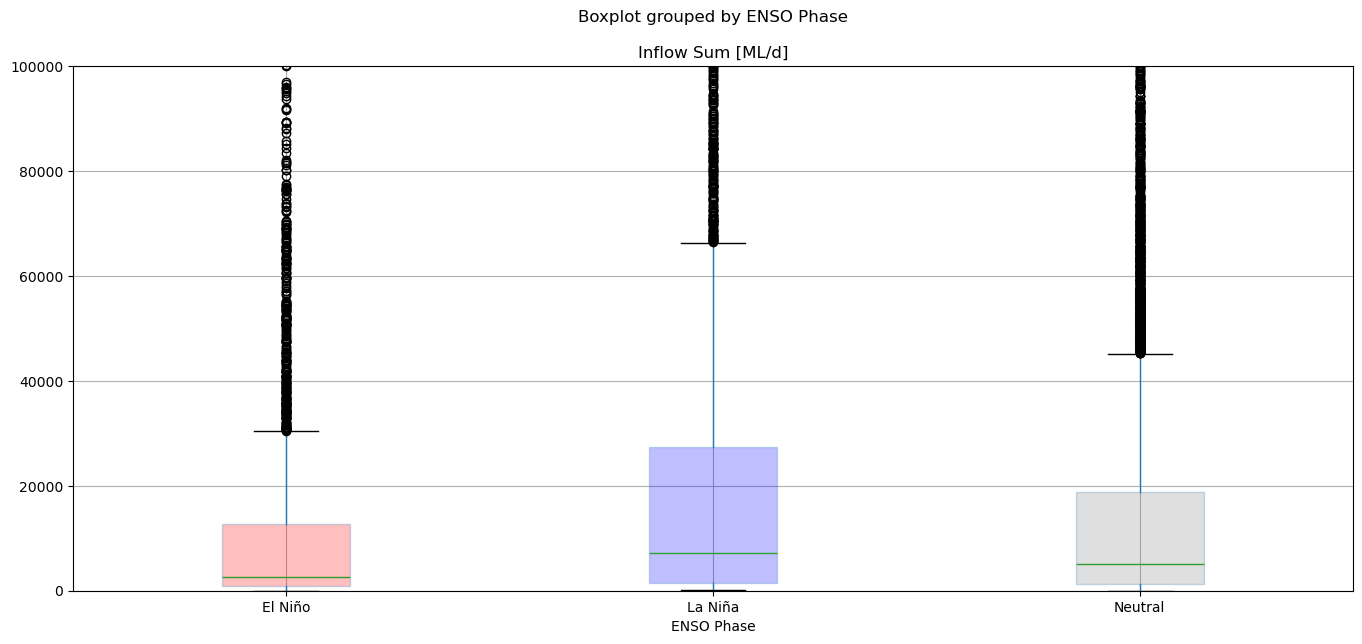

In [ ]:
'''These are boxplots of all dily discharges for each ENSO Phase.
While this does show a clear difference between the three different phases, all phases contain a fair amount of outliers.'''

colors = {"El Niño": "gray", "La Niña": "red", "Neutral": "blue"} #DO NOT TOUCH. I DONT KNOW WHY IT WORKS THIS WAY

fig, ax = plt.subplots(figsize = (16,7))
boxplot = df_inflow.boxplot(ax = ax, column='Inflow Sum [ML/d]', by = 'ENSO Phase', patch_artist = True)

# Extract unique ENSO phases in the **order they appear on the plot**
enso_phases_sorted = sorted(df_inflow["ENSO Phase"].dropna().unique(), key=lambda x: df_inflow[df_inflow["ENSO Phase"] == x].index.min())

# Apply colors to the correct boxes
for box, phase in zip(ax.patches, enso_phases_sorted):  
    box.set_facecolor(colors.get(phase, "gray"))  # Assign correct color
    box.set_alpha(0.25)

ax.set_ylim(0, 100000)
plt.show()

In [15]:
df_nino = df_inflow.loc[df_inflow['ENSO Phase']  == 'El Niño']
df_nina = df_inflow.loc[df_inflow['ENSO Phase']  == 'La Niña']
df_neutral = df_inflow.loc[df_inflow['ENSO Phase']  == 'Neutral']
df_nino['Inflow Sum [ML/d]'].describe(), df_nina['Inflow Sum [ML/d]'].describe(), df_neutral['Inflow Sum [ML/d]'].describe()

(count      3522.000000
 mean      13231.660845
 std       29423.351967
 min           0.884304
 25%         808.761681
 50%        2530.333100
 75%       12649.393053
 max      382589.536023
 Name: Inflow Sum [ML/d], dtype: float64,
 count    4.055000e+03
 mean     2.578179e+04
 std      6.222502e+04
 min      5.122667e+01
 25%      1.496020e+03
 50%      7.147557e+03
 75%      2.736442e+04
 max      1.265832e+06
 Name: Inflow Sum [ML/d], dtype: float64,
 count    1.015800e+04
 mean     1.831594e+04
 std      4.357966e+04
 min      5.963161e-01
 25%      1.206629e+03
 50%      5.094648e+03
 75%      1.879194e+04
 max      1.213309e+06
 Name: Inflow Sum [ML/d], dtype: float64)

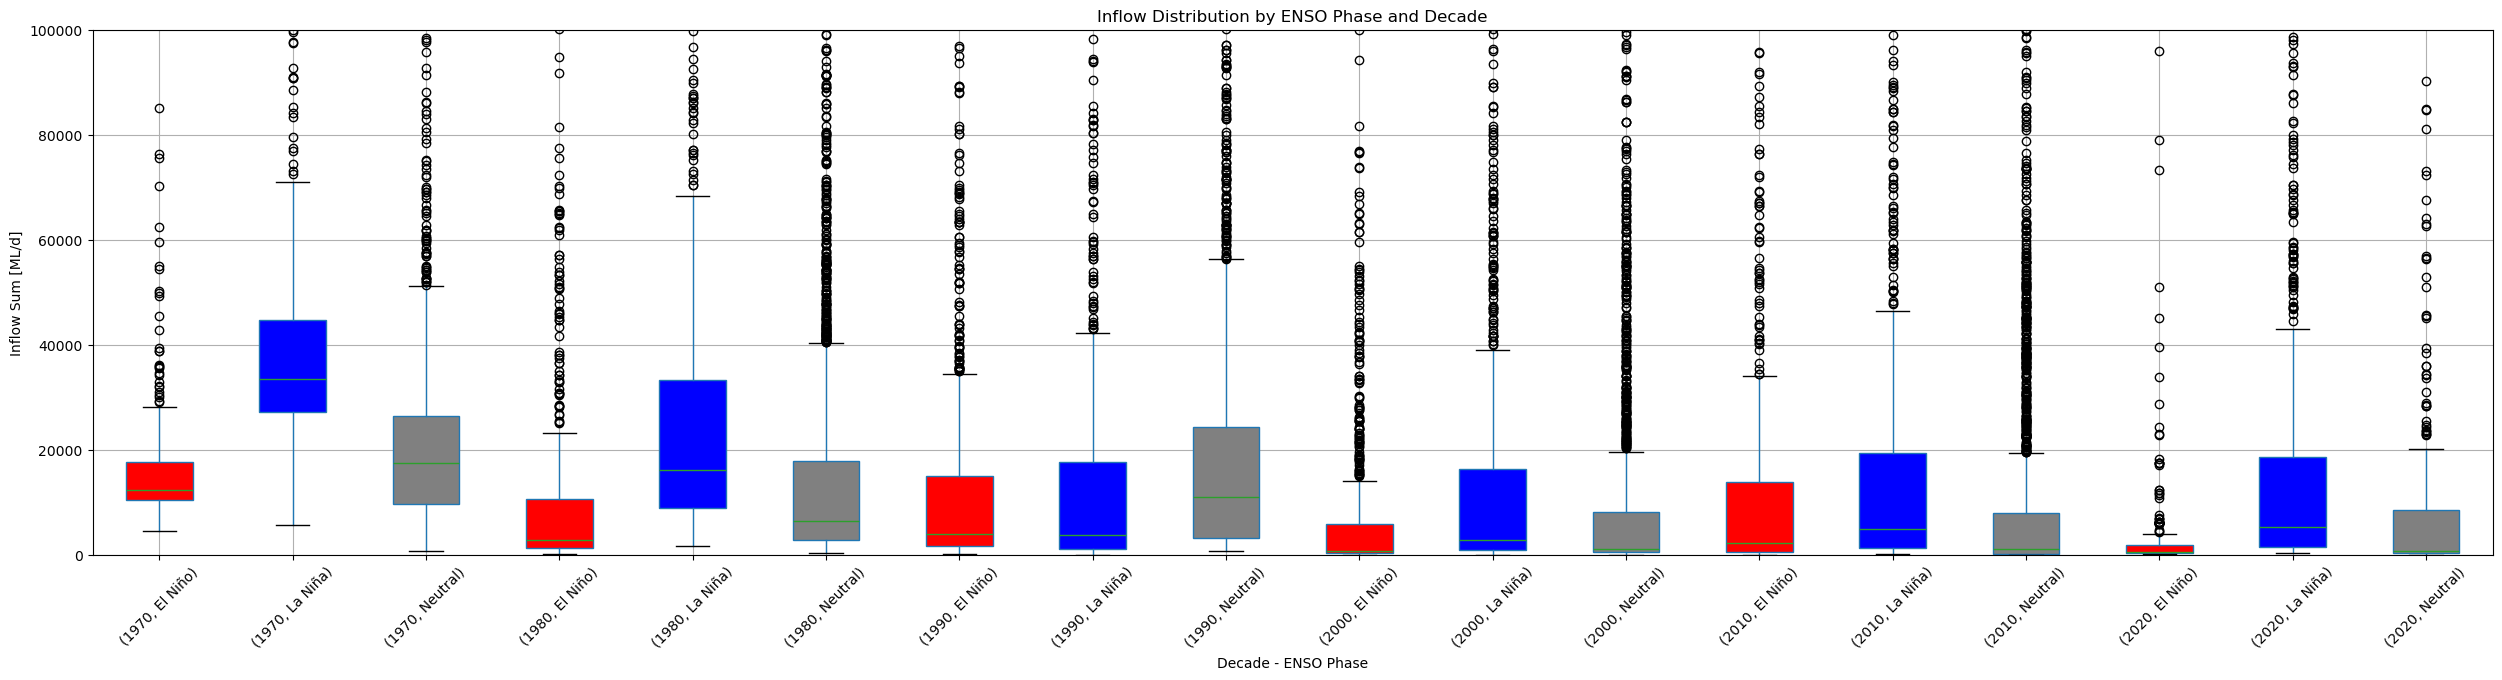

In [ ]:
'''The following boxplots do the same as the boxplots, except it is separated by decade. This is not included in the poster as it does not provide
an immediate clear image.'''
colors = {"El Niño": "red", "La Niña": "blue", "Neutral": "gray"}
# Ensure 'Decade' column exists
df_inflow["Decade"] = (df_inflow.index.year // 10) * 10  # Get decades (e.g., 1970, 1980, 1990)

# Create the figure
fig, ax = plt.subplots(figsize=(30, 7))

# Boxplot grouped by 'Decade' and 'ENSO Phase'
boxplot = df_inflow.boxplot(ax=ax, column="Inflow Sum [ML/d]", by=["Decade", "ENSO Phase"], patch_artist=True)

# Get sorted unique ENSO phases
enso_phases_sorted = df_inflow["ENSO Phase"].dropna().unique()

# Apply colors to each box
for patch, (decade, phase) in zip(ax.patches, df_inflow.groupby(["Decade", "ENSO Phase"]).groups.keys()):  
    patch.set_facecolor(colors.get(phase, "gray"))  # Assign correct color

ax.set_ylim(0, 100000)
ax.set_title("Inflow Distribution by ENSO Phase and Decade")
ax.set_xlabel("Decade - ENSO Phase")
ax.set_ylabel("Inflow Sum [ML/d]")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.suptitle("")  # Remove default subplot title
plt.show()

<h1> Discharge Boxplot </h1>
This boxplot contains just the discharge into the lake Burragorang (no precipitation included).
Just as the previous boxplots, these also are shown for each decade

Text(0.5, 0.98, '')

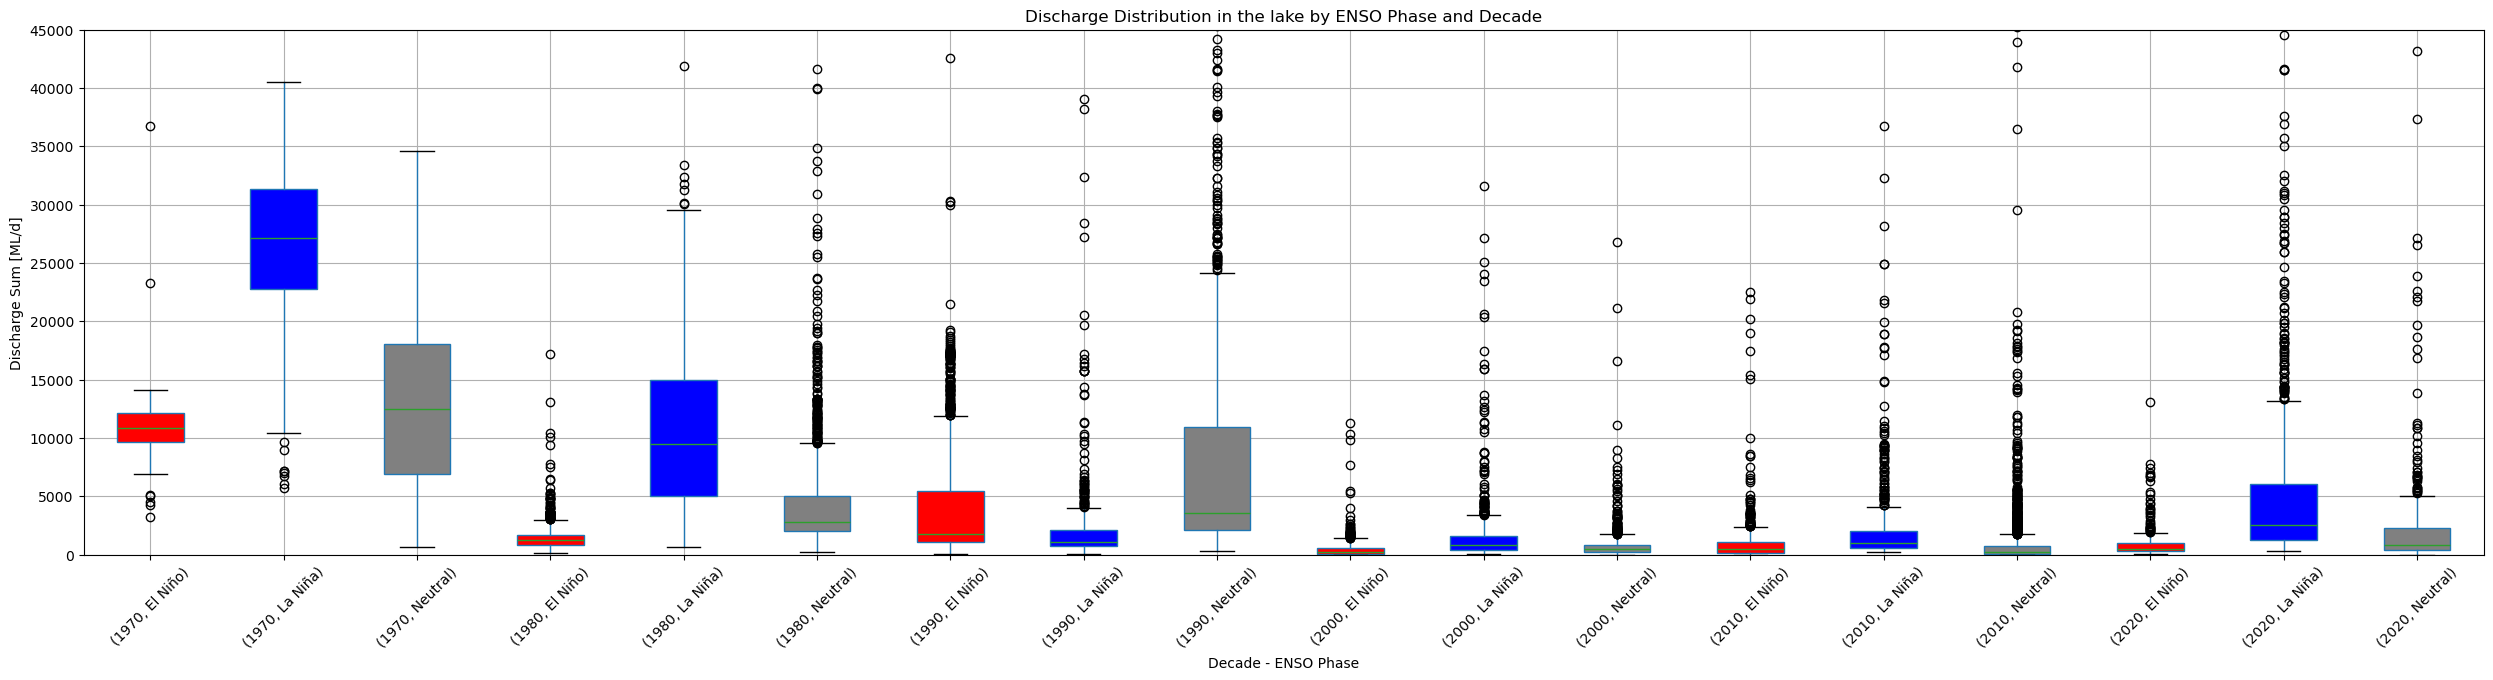

In [17]:
df_discharge_filled_test["ENSO Phase"] = df_discharge_filled_test.index.to_series().apply(classify_enso)

colors = {"El Niño": "red", "La Niña": "blue", "Neutral": "gray"} #DO NOT TOUCH. I DONT KNOW WHY IT WORKS THIS WAY
# Ensure 'Decade' column exists
df_discharge_filled_test["Decade"] = (df_discharge_filled_test.index.year // 10) * 10  # Get decades (e.g., 1970, 1980, 1990)

# Create the figure
fig, ax = plt.subplots(figsize=(30, 7))

# Boxplot grouped by 'Decade' and 'ENSO Phase'
boxplot = df_discharge_filled_test.boxplot(ax=ax, column="Q_sum [ML/d]", by=["Decade", "ENSO Phase"], patch_artist=True)

# Get sorted unique ENSO phases
enso_phases_sorted = df_discharge_filled_test["ENSO Phase"].dropna().unique()

# Apply colors to each box
for patch, (decade, phase) in zip(ax.patches, df_discharge_filled_test.groupby(["Decade", "ENSO Phase"]).groups.keys()):  
    patch.set_facecolor(colors.get(phase, "gray"))  # Assign correct color

ax.set_ylim(0, 45000)
ax.set_title("Discharge Distribution in the lake by ENSO Phase and Decade")
ax.set_xlabel("Decade - ENSO Phase")
ax.set_ylabel("Discharge Sum [ML/d]")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.suptitle("")

<h1> Include Mean in the Inflow Plot </h1>
Here the mean of each period is included in the plot of the inflow over time. This is done to show potential differences between succesive ENSO Phase differences more clearly.
This is followed by boxplots of the mean and median of each El Niño/ La Niña period, sorted by ENSO Phase. 

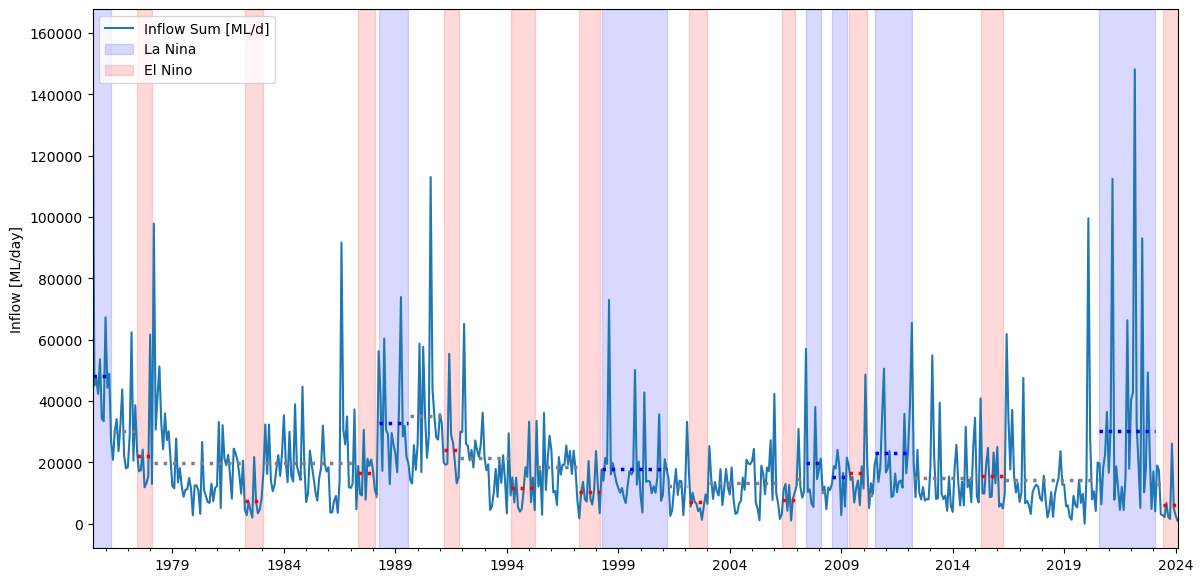

In [32]:
# Define colors for each ENSO phase
colors = {"El Niño": "red", "La Niña": "blue", "Neutral": "gray"}

# Create a column for event groups (separate ENSO events)
df_inflow["Event_ID"] = (df_inflow["ENSO Phase"] != df_inflow["ENSO Phase"].shift()).cumsum()

# Compute median inflow for each separate ENSO event
event_means = df_inflow.groupby(["Event_ID", "ENSO Phase"])["Inflow Sum [ML/d]"].mean().reset_index()
event_medians = df_inflow.groupby(["Event_ID", "ENSO Phase"])["Inflow Sum [ML/d]"].median().reset_index()

inflow = df_inflow['Inflow Sum [ML/d]'].resample('ME').mean()
fig, ax = plt.subplots(figsize = (14,7))
inflow.plot(ax = ax)
# Add horizontal lines for each ENSO event's median inflow
for _, row in event_means.iterrows():
    event_data = df_inflow[df_inflow["Event_ID"] == row["Event_ID"]]
    ax.hlines(row["Inflow Sum [ML/d]"], xmin=event_data.index.min(), xmax=event_data.index.max(),
              colors=colors[row["ENSO Phase"]], linestyles='dotted', linewidth=2.5)

ax.axvspan('1975-06-21', '1976-04', color = 'b' , alpha= 0.15, label = 'La Nina')
ax.axvspan('1977-06', '1978-02', color = 'r' , alpha= 0.15, label = 'El Nino')
ax.axvspan('1982-04', '1983-02', color = 'r' , alpha= 0.15)
ax.axvspan('1987-05', '1988-02', color = 'r' , alpha= 0.15)
ax.axvspan('1988-04', '1989-08', color = 'b' , alpha= 0.15)
ax.axvspan('1991-03', '1991-11', color = 'r' , alpha= 0.15)
ax.axvspan('1994-03', '1995-04', color = 'r' , alpha= 0.15)
ax.axvspan('1997-04', '1998-03', color = 'r' , alpha= 0.15)
ax.axvspan('1998-04', '2001-03', color = 'b' , alpha= 0.15)
ax.axvspan('2002-03', '2003-01', color = 'r' , alpha= 0.15)
ax.axvspan('2006-05', '2006-12', color = 'r' , alpha= 0.15)
ax.axvspan('2007-06', '2008-02', color = 'b' , alpha= 0.15)
ax.axvspan('2008-08', '2009-04', color = 'b' , alpha= 0.15)
ax.axvspan('2009-05', '2010-03', color = 'r' , alpha= 0.15)
ax.axvspan('2010-07', '2012-03', color = 'b' , alpha= 0.15)
ax.axvspan('2015-04', '2016-04', color = 'r' , alpha= 0.15)
ax.axvspan('2020-08', '2023-02', color = 'b' , alpha= 0.15)
ax.axvspan('2023-06', '2024-03', color = 'r' , alpha= 0.15)
#ax.set_title('Inflow in Lake Burragorang 1975-2024') #Will be added on the poster
ax.set_ylabel('Inflow [ML/day]') #Will be added in the poster
ax.legend()
#ax.set_ylim(0, 500000)

In [19]:
enso_medians = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].median()
enso_mean = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].mean()
enso_std = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].std()

enso_data = pd.DataFrame({'Median': enso_medians, 'Mean' : enso_mean, 'Standard Deviation': enso_std})
enso_data['25% Quantile'] = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].quantile(0.25)
enso_data['75% Quantile'] = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].quantile(0.75)
enso_data['90% Quantile'] = df_inflow.groupby("ENSO Phase")["Inflow Sum [ML/d]"].quantile(0.90)

enso_data

,Median,Mean,Standard Deviation,25% Quantile,75% Quantile,90% Quantile
ENSO Phase,,,,,,
El Niño,2530.333100,13231.660845,29423.351967,808.761681,12649.393053,34264.270059
La Niña,7147.557000,25781.793765,62225.018872,1496.019552,27364.415294,63096.071478
Neutral,5094.648027,18315.937826,43579.663523,1206.628687,18791.935146,45161.738899


In [20]:
enso_data['Median w.r.t. Neutral'] = enso_data['Median'] / enso_data['Median'][2]
enso_data['Mean w.r.t. Neutral'] = enso_data['Mean'] / enso_data['Mean'][2]
enso_data

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_37988\638076706.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  enso_data['Median w.r.t. Neutral'] = enso_data['Median'] / enso_data['Median'][2]
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_37988\638076706.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  enso_data['Mean w.r.t. Neutral'] = enso_data['Mean'] / enso_data['Mean'][2]


,Median,Mean,Standard Deviation,25% Quantile,75% Quantile,90% Quantile,Median w.r.t. Neutral,Mean w.r.t. Neutral
ENSO Phase,,,,,,,,
El Niño,2530.333100,13231.660845,29423.351967,808.761681,12649.393053,34264.270059,0.496665,0.722412
La Niña,7147.557000,25781.793765,62225.018872,1496.019552,27364.415294,63096.071478,1.402954,1.407615
Neutral,5094.648027,18315.937826,43579.663523,1206.628687,18791.935146,45161.738899,1.000000,1.000000


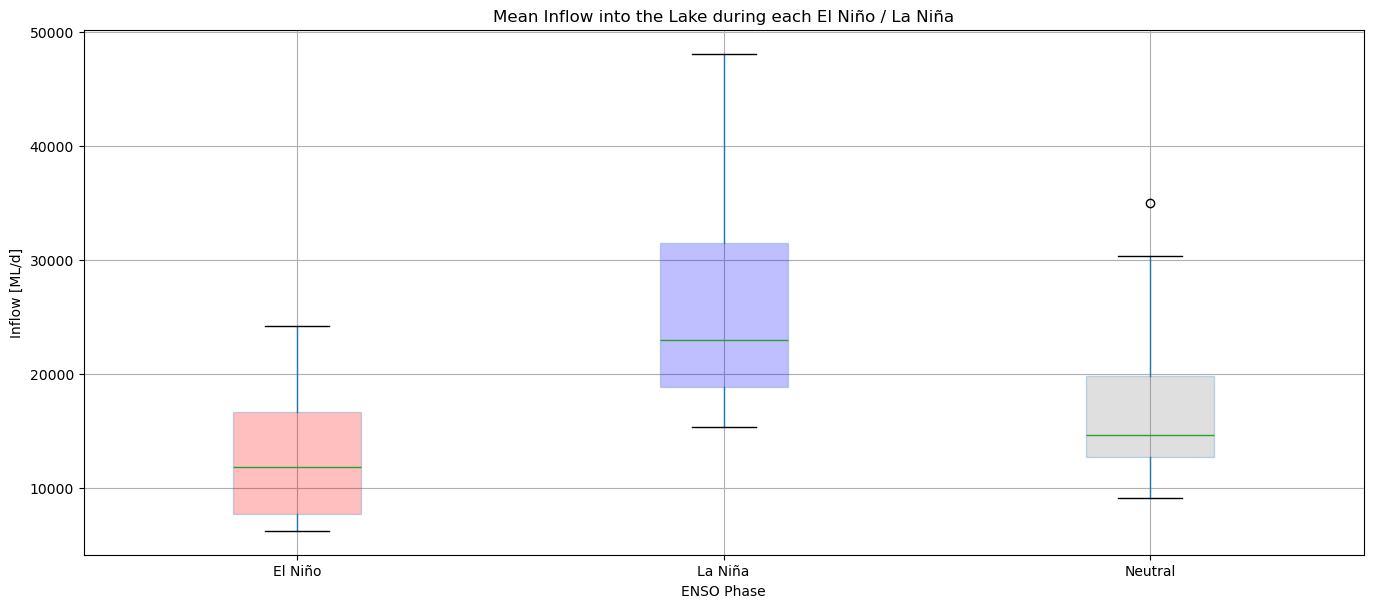

In [41]:
colors = {"El Niño": "gray", "La Niña": "red", "Neutral": "blue"} #DO NOT TOUCH. I DONT KNOW WHY IT WORKS THIS WAY

fig, ax = plt.subplots(figsize = (16,7))
boxplot = event_means.boxplot(ax = ax, column='Inflow Sum [ML/d]', by = 'ENSO Phase', patch_artist = True)

# Extract unique ENSO phases in the **order they appear on the plot**
enso_phases_sorted = sorted(df_inflow["ENSO Phase"].dropna().unique(), key=lambda x: df_inflow[df_inflow["ENSO Phase"] == x].index.min())

# Apply colors to the correct boxes
for box, phase in zip(ax.patches, enso_phases_sorted):  
    box.set_facecolor(colors.get(phase, "gray"))  # Assign correct color
    box.set_alpha(0.25)

#ax.set_ylim(0, 100000)
ax.set_title("Mean Inflow into the Lake during each El Niño / La Niña")
ax.set_ylabel("Inflow [ML/d]")
plt.suptitle("")
plt.show()

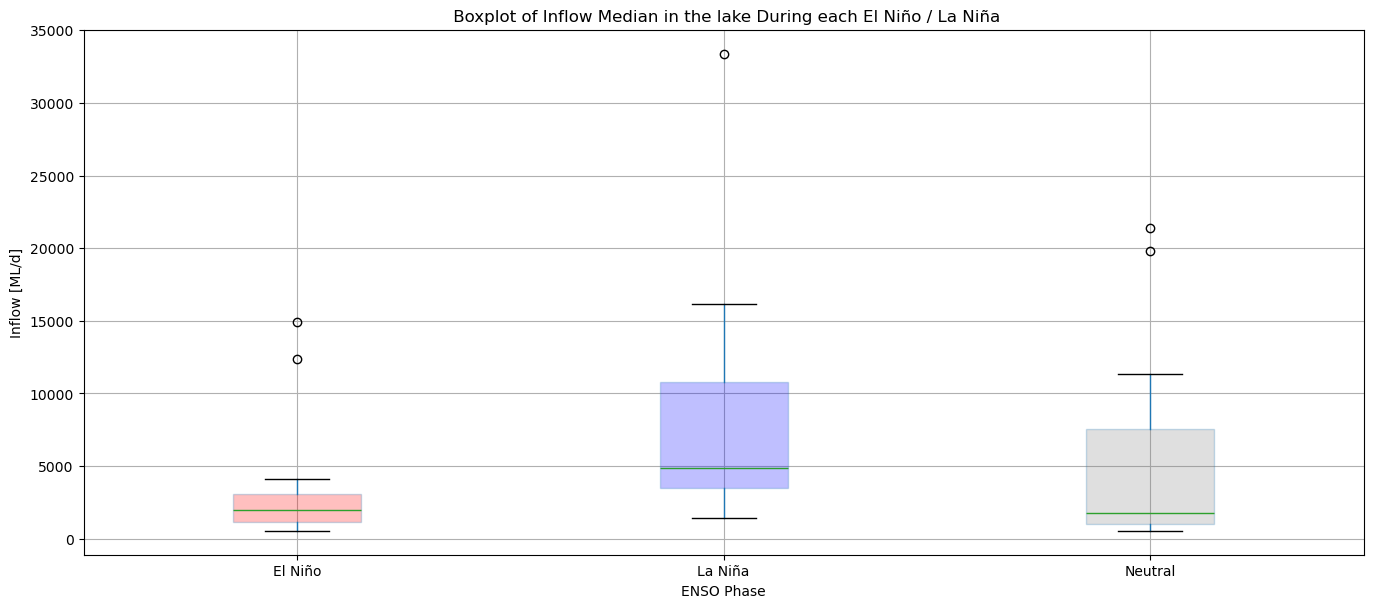

In [22]:
colors = {"El Niño": "gray", "La Niña": "red", "Neutral": "blue"} #DO NOT TOUCH. I DONT KNOW WHY IT WORKS THIS WAY

fig, ax = plt.subplots(figsize = (16,7))
boxplot = event_medians.boxplot(ax = ax, column='Inflow Sum [ML/d]', by = 'ENSO Phase', patch_artist = True)

# Extract unique ENSO phases in the **order they appear on the plot**
enso_phases_sorted = sorted(df_inflow["ENSO Phase"].dropna().unique(), key=lambda x: df_inflow[df_inflow["ENSO Phase"] == x].index.min())

# Apply colors to the correct boxes
for box, phase in zip(ax.patches, enso_phases_sorted):  
    box.set_facecolor(colors.get(phase, "gray"))  # Assign correct color
    box.set_alpha(0.25)

#ax.set_ylim(0, 100000)
ax.set_title(" Boxplot of Inflow Median in the lake During each El Niño / La Niña")
ax.set_ylabel("Inflow [ML/d]")
plt.suptitle("")
plt.show()

<h1> Flow duration Curve </h1>
To apply a more hydrological method we calculated the FLow Duration curve of each ENSO Phase. This plot was not included in the psoter as wel felt that including the boxplot would provide a more immediate clear picture.

In [23]:
el_nino_sorted = df_nino['Inflow Sum [ML/d]'].sort_values(ascending=False)
la_nina_sorted = df_nina['Inflow Sum [ML/d]'].sort_values(ascending=False)
neutral_sorted = df_neutral['Inflow Sum [ML/d]'].sort_values(ascending=False)
neutral_sorted

1978-03-20    1.213309e+06
1990-08-02    1.181163e+06
1986-08-06    1.059510e+06
2020-02-10    9.225236e+05
2013-02-24    6.429487e+05
                  ...     
2020-01-02    1.195534e+00
2020-01-03    1.152085e+00
2020-01-04    1.091588e+00
2020-01-05    1.051074e+00
2003-02-07    5.963161e-01
Name: Inflow Sum [ML/d], Length: 10158, dtype: float64

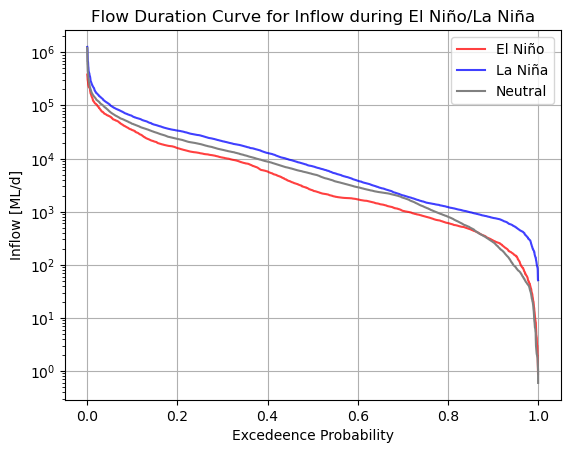

In [24]:
rank_el_nino = np.arange(1, len(el_nino_sorted)+1)
rank_la_nina = np.arange(1, len(la_nina_sorted)+1)
rank_neutral = np.arange(1, len(neutral_sorted)+1)

P_el_nino = rank_el_nino / (len(rank_el_nino)+1)
P_la_nina = rank_la_nina / (len(rank_la_nina)+1)
P_neutral = rank_neutral / (len(rank_neutral)+1)

plt.plot(P_el_nino, el_nino_sorted, 'r', alpha = 0.75, label = 'El Niño')
plt.plot(P_la_nina, la_nina_sorted, 'b',alpha = 0.75, label = 'La Niña')
plt.plot(P_neutral, neutral_sorted, 'gray', alpha = 1,label = 'Neutral')
plt.grid()
plt.legend()
plt.ylabel('Inflow [ML/d]')
plt.xlabel('Excedeence Probability')
plt.title('Flow Duration Curve for Inflow during El Niño/La Niña')
plt.yscale('log')
plt.show()

<h1> Storage Levels in Lake </h1>
To get an overview of the Storage Levels in the Lake we also created the plot of the wter level in the lake as well as the boxplots.
This is not included in the analysis for the poster, as the outflow from Lake Burragorang is man-controlled. This means that the outflow of the lake can be limited in order to preserve water levels in the lake.

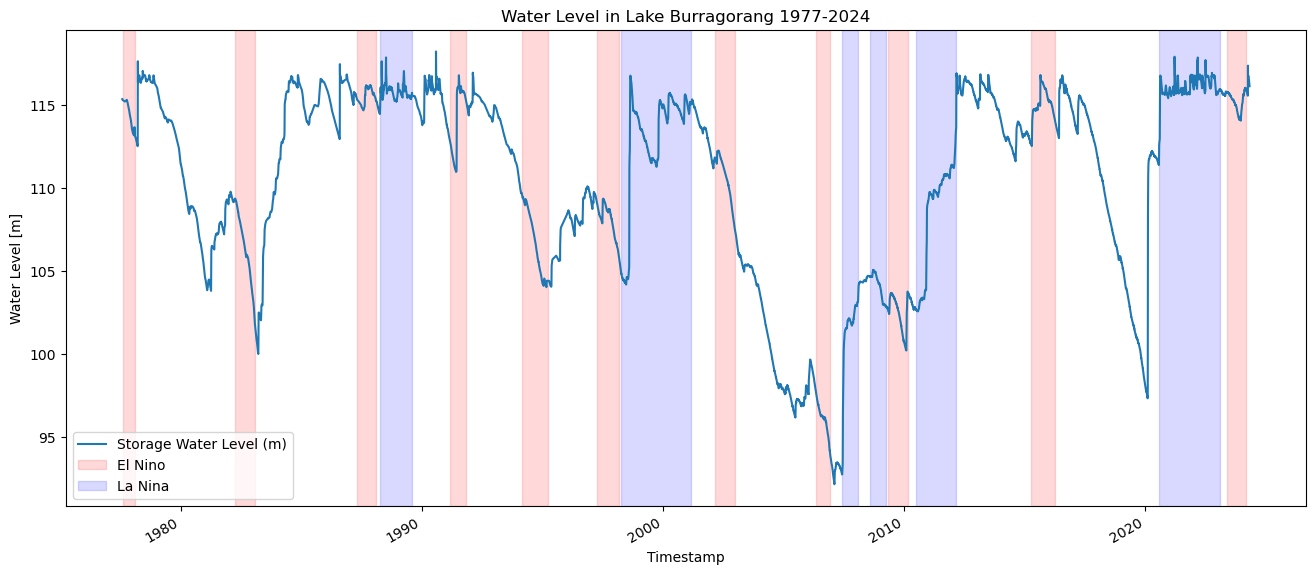

In [25]:
df_storage = pd.read_csv('Data/StorageWaterLevel-212243.csv', index_col=0, usecols= [1,2], parse_dates=True)
fig, ax = plt.subplots(figsize = (16,7))
df_storage.plot(ax = ax)
#ax.axvspan('1975-06-21', '1976-04', color = 'b' , alpha= 0.15, label = 'La Nina')
ax.axvspan('1977-08', '1978-02', color = 'r' , alpha= 0.15, label = 'El Nino')
ax.axvspan('1982-04', '1983-02', color = 'r' , alpha= 0.15)
ax.axvspan('1987-05', '1988-02', color = 'r' , alpha= 0.15)
ax.axvspan('1988-04', '1989-08', color = 'b' , alpha= 0.15, label = 'La Nina')
ax.axvspan('1991-03', '1991-11', color = 'r' , alpha= 0.15)
ax.axvspan('1994-03', '1995-04', color = 'r' , alpha= 0.15)
ax.axvspan('1997-04', '1998-03', color = 'r' , alpha= 0.15)
ax.axvspan('1998-04', '2001-03', color = 'b' , alpha= 0.15)
ax.axvspan('2002-03', '2003-01', color = 'r' , alpha= 0.15)
ax.axvspan('2006-05', '2006-12', color = 'r' , alpha= 0.15)
ax.axvspan('2007-06', '2008-02', color = 'b' , alpha= 0.15)
ax.axvspan('2008-08', '2009-04', color = 'b' , alpha= 0.15)
ax.axvspan('2009-05', '2010-03', color = 'r' , alpha= 0.15)
ax.axvspan('2010-07', '2012-03', color = 'b' , alpha= 0.15)
ax.axvspan('2015-04', '2016-04', color = 'r' , alpha= 0.15)
ax.axvspan('2020-08', '2023-02', color = 'b' , alpha= 0.15)
ax.axvspan('2023-06', '2024-03', color = 'r' , alpha= 0.15)
ax.set_title('Water Level in Lake Burragorang 1977-2024')
ax.set_ylabel('Water Level [m]')
ax.legend()
#ax.set_xlim(1977, 2024)
#ax.set_ylim(0, 500000)
plt.show()



In [26]:
df_storage["ENSO Phase"] = df_storage.index.to_series().apply(classify_enso)


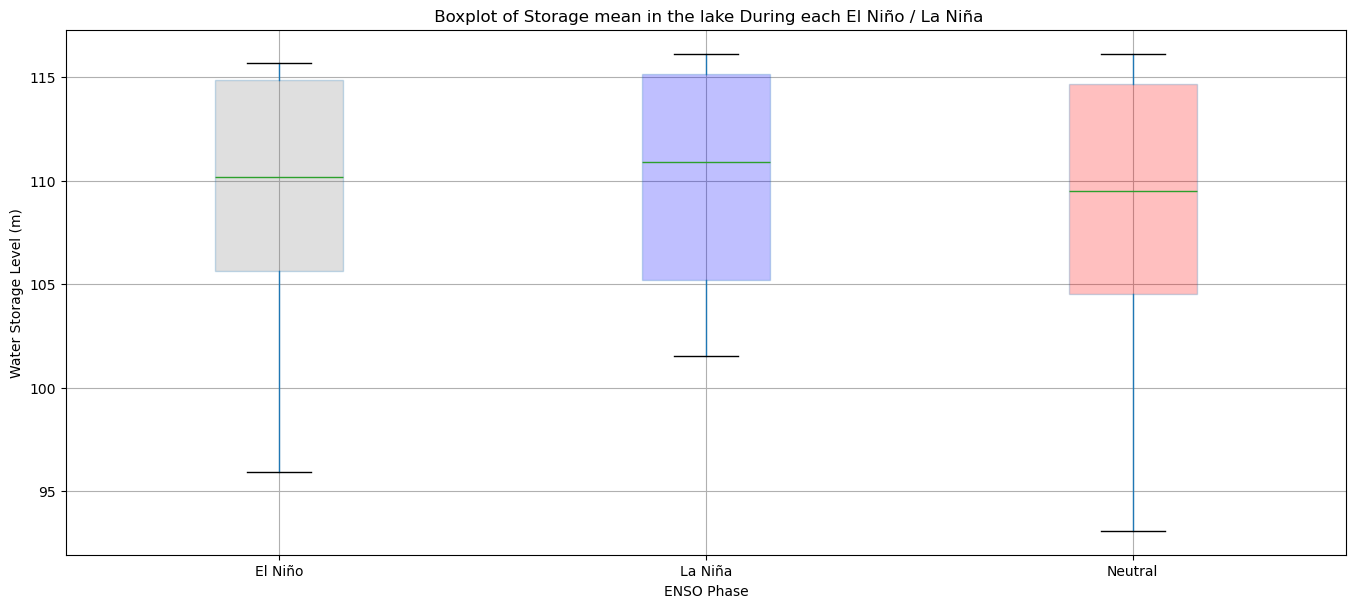

In [27]:
# Create a column for event groups (separate ENSO events)
df_storage["Event_ID"] = (df_storage["ENSO Phase"] != df_storage["ENSO Phase"].shift()).cumsum()

storage_means = df_storage.groupby(["Event_ID", "ENSO Phase"])["Storage Water Level (m)"].mean().reset_index()
storage_medians = df_storage.groupby(["Event_ID", "ENSO Phase"])["Storage Water Level (m)"].median().reset_index()

colors = {"El Niño": "gray", "La Niña": "red", "Neutral": "blue"} #DO NOT TOUCH. I DONT KNOW WHY IT WORKS THIS WAY

fig, ax = plt.subplots(figsize = (16,7))
boxplot = storage_means.boxplot(ax = ax, column='Storage Water Level (m)', by = 'ENSO Phase', patch_artist = True)

# Extract unique ENSO phases in the **order they appear on the plot**
enso_phases_sorted = sorted(df_storage["ENSO Phase"].dropna().unique(), key=lambda x: df_storage[df_storage["ENSO Phase"] == x].index.min())

# Apply colors to the correct boxes
for box, phase in zip(ax.patches, enso_phases_sorted):  
    box.set_facecolor(colors.get(phase, "gray"))  # Assign correct color
    box.set_alpha(0.25)

#ax.set_ylim(0, 100000)
ax.set_title(" Boxplot of Storage mean in the lake During each El Niño / La Niña")
ax.set_ylabel("Water Storage Level (m)")
plt.suptitle("")
plt.show()



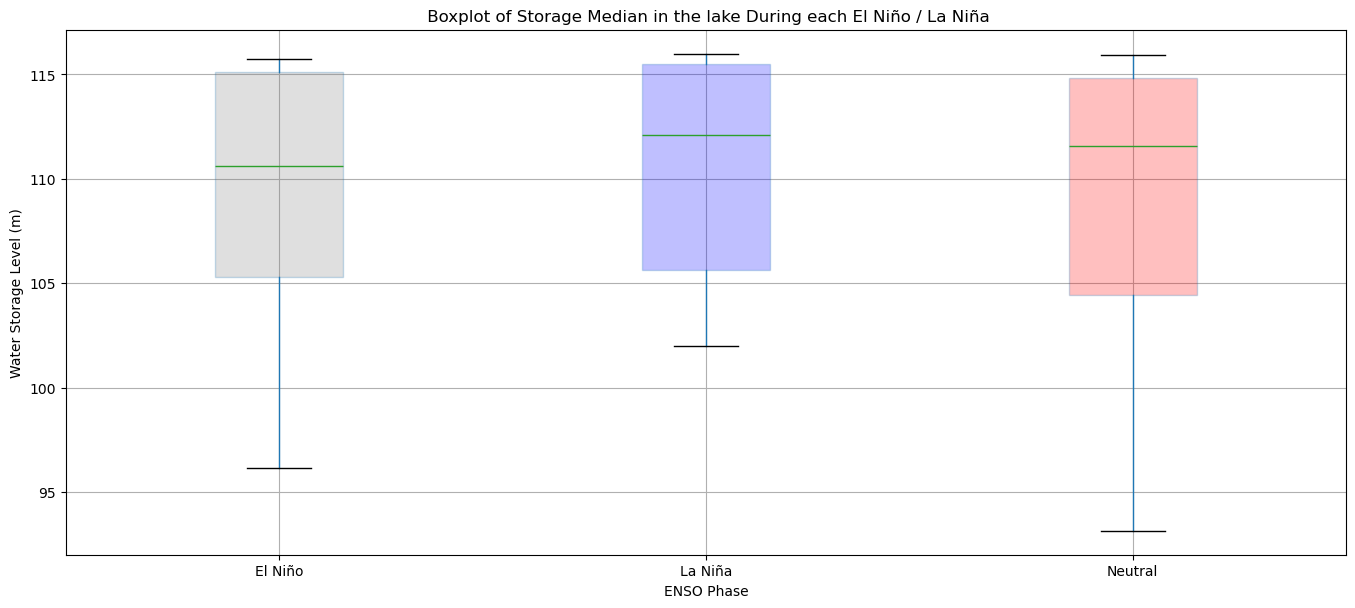

In [28]:
fig, ax = plt.subplots(figsize = (16,7))
boxplot = storage_medians.boxplot(ax = ax, column='Storage Water Level (m)', by = 'ENSO Phase', patch_artist = True)

# Extract unique ENSO phases in the **order they appear on the plot**
enso_phases_sorted = sorted(df_storage["ENSO Phase"].dropna().unique(), key=lambda x: df_storage[df_storage["ENSO Phase"] == x].index.min())

# Apply colors to the correct boxes
for box, phase in zip(ax.patches, enso_phases_sorted):  
    box.set_facecolor(colors.get(phase, "gray"))  # Assign correct color
    box.set_alpha(0.25)

#ax.set_ylim(0, 100000)
ax.set_title(" Boxplot of Storage Median in the lake During each El Niño / La Niña")
ax.set_ylabel("Water Storage Level (m)")
plt.suptitle("")
plt.show()